<br>
# **1 의미론 분석**

<br>
## **1 Parsing**
문법적 구조를 활용한 분석

In [1]:
import nltk
nltk.boolean_ops()

negation       	-
conjunction    	&
disjunction    	|
implication    	->
equivalence    	<->


In [2]:
%%time
# 앞부분 Review
text = '민병삼 대령의 항명행위로 초치했다'

from konlpy.tag import Twitter
twitter = Twitter()
words = twitter.pos(text, stem=True)
print(words)

[('민병삼', 'Noun'), ('대령', 'Noun'), ('의', 'Josa'), ('항', 'Noun'), ('명', 'Suffix'), ('행위', 'Noun'), ('로', 'Josa'), ('초치', 'Noun'), ('하다', 'Verb')]
CPU times: user 3.12 s, sys: 92 ms, total: 3.21 s
Wall time: 1.25 s


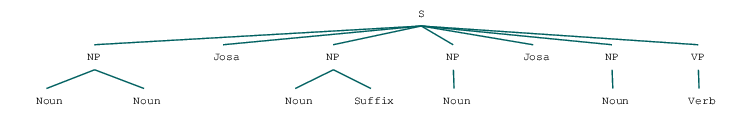

In [3]:
%matplotlib inline
from nltk import RegexpParser

grammar = """
NP: {<N.*>*<Suffix>?}   # 명사구를 정의한다
VP: {<V.*>*}            # 동사구를 정의한다
AP: {<A.*>*}            # 형용사구를 정의한다 """
parser = RegexpParser(grammar)
chunks = parser.parse(words)
chunks


<br>
## **2 촘스키 CGF 문법규칙 활용**
Penn Treebank Corpus

In [4]:
from nltk.corpus import treebank
print(treebank.words('wsj_0007.mrg'))        
print(treebank.tagged_words('wsj_0007.mrg')) 
print(treebank.parsed_sents('wsj_0007.mrg')[2])

['McDermott', 'International', 'Inc.', 'said', '0', ...]
[('McDermott', 'NNP'), ('International', 'NNP'), ...]
(S
  (NP-SBJ
    (NP (NNP Bailey) (NNP Controls))
    (, ,)
    (VP
      (VBN based)
      (NP (-NONE- *))
      (PP-LOC-CLR
        (IN in)
        (NP (NP (NNP Wickliffe)) (, ,) (NP (NNP Ohio)))))
    (, ,))
  (VP
    (VBZ makes)
    (NP
      (JJ computerized)
      (JJ industrial)
      (NNS controls)
      (NNS systems)))
  (. .))


In [5]:
from nltk.grammar import toy_pcfg2
grammar = toy_pcfg2
print(grammar)

Grammar with 23 productions (start state = S)
    S -> NP VP [1.0]
    VP -> V NP [0.59]
    VP -> V [0.4]
    VP -> VP PP [0.01]
    NP -> Det N [0.41]
    NP -> Name [0.28]
    NP -> NP PP [0.31]
    PP -> P NP [1.0]
    V -> 'saw' [0.21]
    V -> 'ate' [0.51]
    V -> 'ran' [0.28]
    N -> 'boy' [0.11]
    N -> 'cookie' [0.12]
    N -> 'table' [0.13]
    N -> 'telescope' [0.14]
    N -> 'hill' [0.5]
    Name -> 'Jack' [0.52]
    Name -> 'Bob' [0.48]
    P -> 'with' [0.61]
    P -> 'under' [0.39]
    Det -> 'the' [0.41]
    Det -> 'a' [0.31]
    Det -> 'my' [0.28]


In [6]:
from nltk.grammar import toy_pcfg2
tokens = "jack seat on table".split()
grammar = toy_pcfg2
print(grammar)

Grammar with 23 productions (start state = S)
    S -> NP VP [1.0]
    VP -> V NP [0.59]
    VP -> V [0.4]
    VP -> VP PP [0.01]
    NP -> Det N [0.41]
    NP -> Name [0.28]
    NP -> NP PP [0.31]
    PP -> P NP [1.0]
    V -> 'saw' [0.21]
    V -> 'ate' [0.51]
    V -> 'ran' [0.28]
    N -> 'boy' [0.11]
    N -> 'cookie' [0.12]
    N -> 'table' [0.13]
    N -> 'telescope' [0.14]
    N -> 'hill' [0.5]
    Name -> 'Jack' [0.52]
    Name -> 'Bob' [0.48]
    P -> 'with' [0.61]
    P -> 'under' [0.39]
    Det -> 'the' [0.41]
    Det -> 'a' [0.31]
    Det -> 'my' [0.28]


<br>
## **3 Earley 차트 파싱 알고리즘**
1970년 발표한 알고리즘으로 Top-Down 파싱과 유사하고 좌측방향 재귀처리를 통해서 문장을 분석한다

In [7]:
import nltk
nltk.parse.featurechart.demo( print_times = False, print_grammar = True, 
                             parser = nltk.parse.featurechart.FeatureChartParser, sent = 'I saw a dog' )


Grammar with 18 productions (start state = S[])
    S[] -> NP[] VP[]
    PP[] -> Prep[] NP[]
    NP[] -> NP[] PP[]
    VP[] -> VP[] PP[]
    VP[] -> Verb[] NP[]
    VP[] -> Verb[]
    NP[] -> Det[pl=?x] Noun[pl=?x]
    NP[] -> 'John'
    NP[] -> 'I'
    Det[] -> 'the'
    Det[] -> 'my'
    Det[-pl] -> 'a'
    Noun[-pl] -> 'dog'
    Noun[-pl] -> 'cookie'
    Verb[] -> 'ate'
    Verb[] -> 'saw'
    Prep[] -> 'with'
    Prep[] -> 'under'

* FeatureChartParser
Sentence: I saw a dog
|. I .saw. a .dog.|
|[---]   .   .   .| [0:1] 'I'
|.   [---]   .   .| [1:2] 'saw'
|.   .   [---]   .| [2:3] 'a'
|.   .   .   [---]| [3:4] 'dog'
|[---]   .   .   .| [0:1] NP[] -> 'I' *
|[--->   .   .   .| [0:1] S[] -> NP[] * VP[] {}
|[--->   .   .   .| [0:1] NP[] -> NP[] * PP[] {}
|.   [---]   .   .| [1:2] Verb[] -> 'saw' *
|.   [--->   .   .| [1:2] VP[] -> Verb[] * NP[] {}
|.   [---]   .   .| [1:2] VP[] -> Verb[] *
|.   [--->   .   .| [1:2] VP[] -> VP[] * PP[] {}
|[-------]   .   .| [0:2] S[] -> NP[] VP[] *
|. 

<br>
# **2 나이브베이즈 활용**

<br>
## **1 NLKT의 영화리뷰 활용**
nltk

In [8]:
from nltk.corpus import movie_reviews

print('Category : {}\n  Length : {}'.format(
    movie_reviews.categories(),
    len(movie_reviews.fileids(movie_reviews.categories()[1])) ))

print('\npos_file_list : {} \nneg_file_list : {}'.format(
    movie_reviews.fileids(movie_reviews.categories()[0])[:5],
    movie_reviews.fileids(movie_reviews.categories()[1])[:5] ))

Category : ['neg', 'pos']
  Length : 1000

pos_file_list : ['neg/cv000_29416.txt', 'neg/cv001_19502.txt', 'neg/cv002_17424.txt', 'neg/cv003_12683.txt', 'neg/cv004_12641.txt'] 
neg_file_list : ['pos/cv000_29590.txt', 'pos/cv001_18431.txt', 'pos/cv002_15918.txt', 'pos/cv003_11664.txt', 'pos/cv004_11636.txt']


In [9]:
# ! cat /home/markbaum/nltk_data/corpora/movie_reviews/neg/cv435_24355.txt
example = """a couple of criminals ( mario van peebles and loretta devine ) move into a rich family's house in 
hopes of conning them out of their jewels . however... """

In [10]:
import nltk, random
docs = [(list(movie_reviews.words(fid)), cat) 
        for cat in movie_reviews.categories()   # ['neg', 'pos']
        for fid in movie_reviews.fileids(cat)]  # 'neg/cv000_29416.txt', ....

random.shuffle(docs)
all_tokens     = nltk.FreqDist(x.lower()    for  x  in  movie_reviews.words())
token_features = list(all_tokens.keys())[:2000]
all_tokens

FreqDist({',': 77717, 'the': 76529, '.': 65876, 'a': 38106, 'and': 35576, 'of': 34123, 'to': 31937, "'": 30585, 'is': 25195, 'in': 21822, ...})

In [11]:
def doc_features(docs):
    doc_words = set(docs)      
    features  = {'word( %s )'%word : (word in doc_words) 
                 for word in token_features }
    return features

In [12]:
feature_sets = [(doc_features(d), c) for (d,c) in docs]
train_sets, test_sets = feature_sets[100:], feature_sets[:100]

classifiers = nltk.NaiveBayesClassifier.train(train_sets)
print('Accuracy :', nltk.classify.accuracy(classifiers, test_sets))
classifiers.show_most_informative_features() 

Accuracy : 0.84
Most Informative Features
   word( unimaginative ) = True              neg : pos    =      7.7 : 1.0
          word( shoddy ) = True              neg : pos    =      7.0 : 1.0
      word( schumacher ) = True              neg : pos    =      7.0 : 1.0
          word( suvari ) = True              neg : pos    =      7.0 : 1.0
            word( mena ) = True              neg : pos    =      7.0 : 1.0
         word( singers ) = True              pos : neg    =      6.3 : 1.0
       word( atrocious ) = True              neg : pos    =      6.2 : 1.0
          word( wasted ) = True              neg : pos    =      5.9 : 1.0
          word( turkey ) = True              neg : pos    =      5.9 : 1.0
        word( explores ) = True              pos : neg    =      5.8 : 1.0


<br>
# **3 나이브베이즈 활용 2**
네이버 영화리뷰 데이터 활용하기

<br>
## **1 NAVER 영화리뷰 데이터 전처리**
https://github.com/e9t/nsmc

In [13]:
! cat ./data/ratings_train.txt | head -n 3

id	document	label
9976970	아 더빙.. 진짜 짜증나네요 목소리	0
3819312	흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나	1


In [14]:
def read_data(filename):
    with open(filename, 'r') as f:
        data = [line.split('\t') for line in f.read().splitlines()]
        data = data[1:]   # header 제외
        
    from random import randint
    random_data = [data[randint(1, len(data))]  for no in range(int(len(data)/50)) ]
    return random_data

train_data = read_data('./data/ratings_train.txt')
test_data  = read_data('./data/ratings_test.txt')
print('Train_data : {}\nsample     : {}'.format(len(train_data), train_data[:3]))
print('Test_data  : {}\nsample     : {}'.format(len(test_data), test_data[:3]))

Train_data : 3000
sample     : [['3765316', '내가세상에서제일좋아하는영화 너무 매혹적인 영화다', '1'], ['6706790', '초중딩때보고 오랜만에 다시봤는데 진짜 추억돋음ㅎㅎ지금봐서 어색한 cg도 추억ㅎ', '1'], ['1071205', '정말 이해할래야 이해할수 없는 영화. 왜 만들었나 싶다', '0']]
Test_data  : 1000
sample     : [['3228611', '난 홍석천이 왜캐 웃기지 ㅋㅋ', '0'], ['9882801', '어설픈 cg와 왜색으로 엉망인 영화', '0'], ['521579', '반전이 기억이 안나는데', '1']]


In [15]:
%time
from konlpy.tag import Twitter
pos_tagger = Twitter()

def tokenize(doc):
    result = ['/'.join(t) for t in pos_tagger.pos(doc, norm=True, stem=True)]
    return result 

train_docs = [(tokenize(row[1]), row[2])    for row in train_data]
test_docs  = [(tokenize(row[1]), row[2])    for row in test_data]

from pprint import pprint
pprint(train_docs[:2])

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.68 µs
[(['내/Determiner',
   '가세/Noun',
   '상/Suffix',
   '에서/Josa',
   '제일/Noun',
   '좋아하다/Adjective',
   '영화/Noun',
   '너무/Noun',
   '매혹/Noun',
   '적/Suffix',
   '인/Josa',
   '영화/Noun',
   '다/Josa'],
  '1'),
 (['초/Noun',
   '중딩/Noun',
   '때/Noun',
   '보고/Noun',
   '오랜만/Noun',
   '에/Josa',
   '다시/Noun',
   '보다/Verb',
   '진짜/Noun',
   '추억/Noun',
   '돋다/Adjective',
   'ㅎㅎ/KoreanParticle',
   '지금/Noun',
   '봐/Noun',
   '서/Josa',
   '어색하다/Adjective',
   'cg/Alpha',
   '도/Noun',
   '추억/Noun',
   'ㅎ/KoreanParticle'],
  '1')]


In [16]:
tokens = [t   for d in train_docs 
              for t in d[0]]
print(len(tokens))

43797


<br>
## **2 nltk 를 활용하여 연산모델 만들기**
https://github.com/e9t/nsmc

In [17]:
import nltk
text = nltk.Text(tokens, name='NMSC')
print("number of Token : {} \nunique Token    : {}\n".format(
    len(text.tokens), len(set(text.tokens))))
pprint(text.vocab().most_common(10))    

number of Token : 43797 
unique Token    : 6545

[('./Punctuation', 1372),
 ('하다/Verb', 990),
 ('영화/Noun', 982),
 ('이/Josa', 788),
 ('보다/Verb', 684),
 ('의/Josa', 564),
 ('../Punctuation', 562),
 ('가/Josa', 546),
 ('에/Josa', 508),
 ('.../Punctuation', 492)]


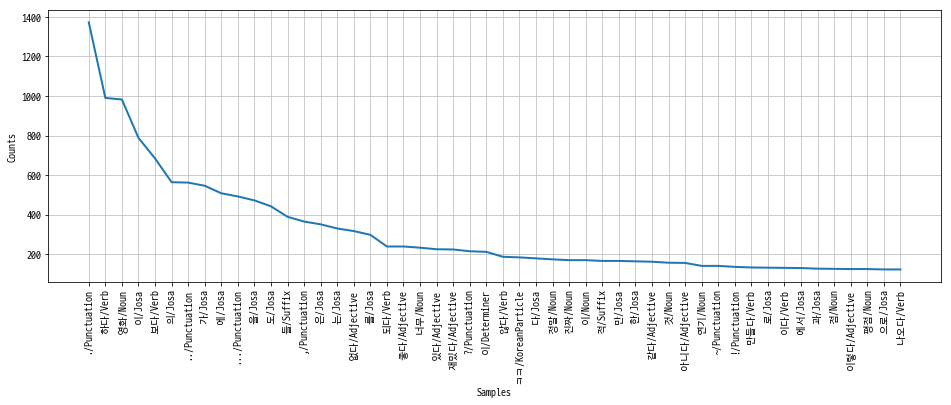

In [18]:
%matplotlib inline
from matplotlib import font_manager, rc
font_fname = './data/D2Coding.ttf'     
font_name = font_manager.FontProperties(fname=font_fname).get_name()
rc('font', family=font_name)

import matplotlib.pyplot as plt
plt.figure(figsize=(16,5))
text.plot(50) 

<br>
## **3 모델의 정확도/ 일반화를 높이는 추가작업**
우도 상위 2000개 데이터를 추출

In [19]:
%%time
selected_words = [f[0] for f in text.vocab().most_common(2000)]
def term_exists(doc):
    return {'exists({})'.format(word): (word in set(doc)) for word in selected_words}

train_docs = train_docs[:10000]
train_xy   = [(term_exists(d), c) for d, c in train_docs]
test_xy    = [(term_exists(d), c) for d, c in test_docs]

CPU times: user 6.88 s, sys: 372 ms, total: 7.25 s
Wall time: 7.25 s


In [20]:
%%time
classifier = nltk.NaiveBayesClassifier.train(train_xy)

CPU times: user 6.95 s, sys: 1.89 ms, total: 6.95 s
Wall time: 6.95 s


<br>
## **4 생성한 모델을 평가**
Accuracy

In [21]:
print('네이버 긍부정 모델의 Accuracy : {}'.format(
    nltk.classify.accuracy(classifier, test_xy)))
classifier.show_most_informative_features(10)

네이버 긍부정 모델의 Accuracy : 0.788
Most Informative Features
   exists(슬프다/Adjective) = True                1 : 0      =     14.4 : 1.0
          exists(냐/Josa) = True                0 : 1      =     13.6 : 1.0
        exists(쓰레기/Noun) = True                0 : 1      =     13.5 : 1.0
  exists(재미없다/Adjective) = True                0 : 1      =     12.9 : 1.0
          exists(굿/Noun) = True                1 : 0      =     10.4 : 1.0
         exists(점도/Noun) = True                0 : 1      =     10.3 : 1.0
         exists(짜증/Noun) = True                0 : 1      =     10.2 : 1.0
        exists(OO/Alpha) = True                0 : 1      =      9.6 : 1.0
         exists(설정/Noun) = True                0 : 1      =      9.6 : 1.0
         exists(모습/Noun) = True                1 : 0      =      9.0 : 1.0


In [22]:
text.concordance('섹시하다/Adjective', lines=10)

Displaying 2 of 2 matches:
tuation 바네사/Noun 는/Josa 넘다/Verb 섹시하다/Adjective 역/Noun 맡다/Verb 안달/Noun 난/Josa 배
투/Noun 는/Josa 또/Noun 어찌나/Adverb 섹시하다/Adjective .../Punctuation 담다/Verb 하다/Verb
